### 구글 번역 사용

GCP console에서 cloud translation API 사용 설정해줍니다.

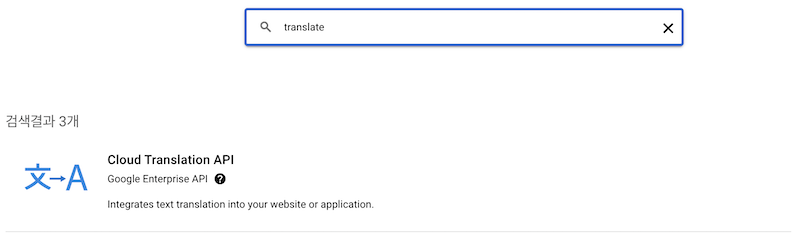

그 다음, IAM 및 관리자 탭에서 서비스 계정을 선택하시고, cloud translation API 관리자 권한을 가진cccccccloud translation AP

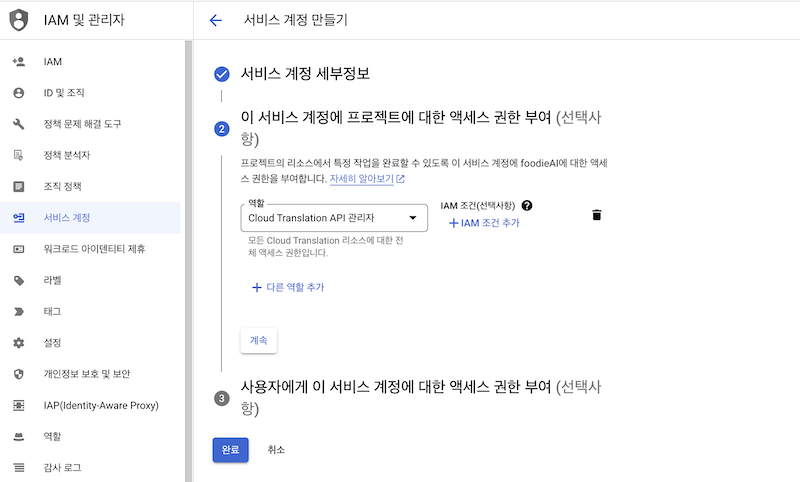

새롭게 만든 서비스 계정에 JSON 타입의 새 키를 만들어 줍니다.

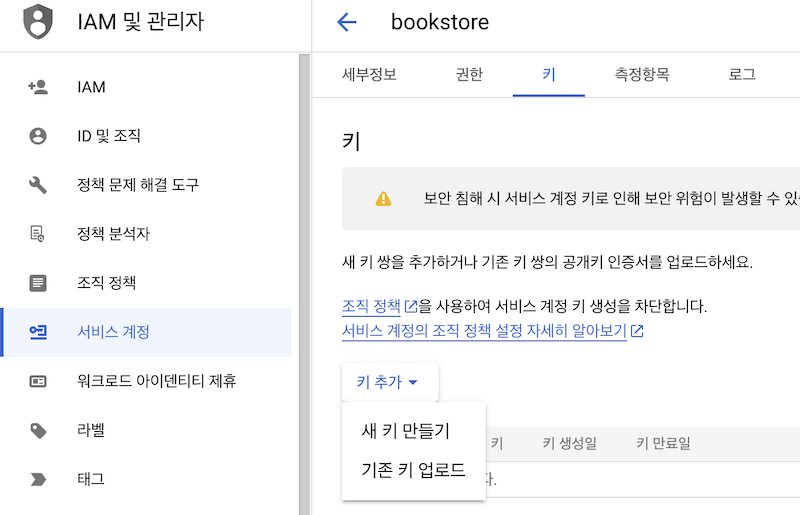

다운받은 키 값은 data 폴더 안에 넣어줍니다. 이제 인증키 값을 가지고 google translation client를 생성해보겠습니다.

In [35]:
!pip install google-auth
!pip install google-cloud-translate


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [36]:
import json

with open("./data/google_secret.json") as fr:
    google_secret = json.loads(fr.read())

In [37]:
from google.oauth2.service_account import Credentials
from google.cloud import translate

credentials = Credentials.from_service_account_info(google_secret)
google_translate_client = translate.TranslationServiceClient(credentials=credentials)

In [38]:
def get_translation(query):
    parent = f"projects/{google_secret['project_id']}/locations/global"
    response = google_translate_client.translate_text(
        request={
            "parent": parent,
            "contents": [query],
            "mime_type": "text/plain",
            "source_language_code": "ko",
            "target_language_code": "en-US",
        }
    )
    return response.translations[0].translated_text

In [39]:
query = "가슴이 따뜻해지는 여행기"
eng_query = get_translation(query)
print(eng_query)

A travelogue that warms the heart
